0.036854397451379264
year
2011    360
2012    328
2013    368
2014    830
2015    342
2016    449
2017    475
2018    461
2019    458
2020    647
2021    646
2022    458
Name: injured, dtype: int64
bpd average year
2011     96421.474132
2012     97515.361269
2013     99771.862159
2014    112589.650642
2015    118041.488626
2016    124787.164775
2017    124254.563280
2018    131321.462320
2019    127094.346316
2020    132487.610436
2021    132114.566694
2022    133494.427569
Name: total earnings, dtype: float64
overall average year
2011    63263.280861
2012    62207.346421
2013    61611.571225
2014    66920.917950
2015    70856.195026
2016    71677.868383
2017    71517.447431
2018    72896.136820
2019    77073.528048
2020    83262.399459
2021    82792.663187
2022    83202.257179
Name: total earnings, dtype: float64
percent overall injury 0.036854397451379264


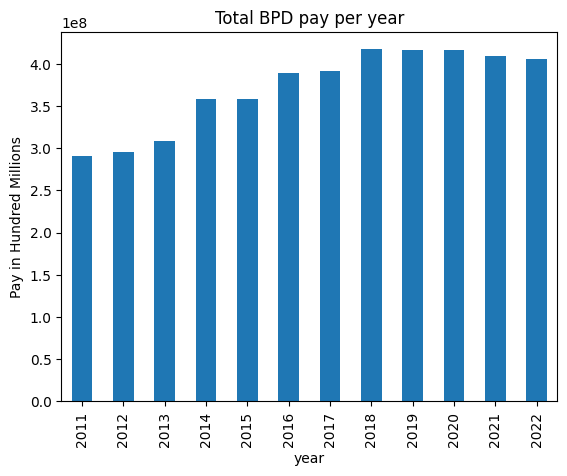

In [243]:

import pandas as pd
import matplotlib as plt
p2011 = pd.read_csv("employee-earnings-report-2011.csv", thousands=',')
p2012 = pd.read_csv("employee-earnings-report-2012.csv", thousands=',')
p2013 = pd.read_csv("employee-earnings-report-2013.csv", thousands=',')
p2014 = pd.read_csv("employee-earnings-report-2014.csv", thousands=',')
p2015 = pd.read_csv("employee-earnings-report-2015.csv", thousands=',')
p2016 = pd.read_csv("employee-earnings-report-2016.csv", thousands=',')
p2017 = pd.read_csv("employee-earnings-report-2017.csv", thousands=',')
p2018 = pd.read_csv("employeeearningscy18full.csv", encoding="UTF-8", encoding_errors="ignore", thousands=',')
p2019 = pd.read_csv("allemployeescy2019_feb19_20final-all.csv", thousands=',')
p2020 = pd.read_csv("city-of-boston-calendar-year-2020-earnings.csv", thousands=',')
p2021 = pd.read_csv("employee-earnings-report-2021.csv", encoding='utf-16', thousands=',')
p2022 = pd.read_csv("finalconsolidatedcy22earnings_feb2023.xlsx-sheet1.csv", thousands=',')

p2011["Year"] = 2011
p2012["Year"] = 2012
p2013["Year"] = 2013
p2014["Year"] = 2014
p2015["Year"] = 2015
p2016["Year"] = 2016
p2017["Year"] = 2017
p2018["Year"] = 2018
p2019["Year"] = 2019
p2020["Year"] = 2020
p2021["Year"] = 2021
p2022["Year"] = 2022
p2021.rename({"total_gross":"total earnings"})
p2022.rename({"total_gross":"total earnings"})
p2022.head()
ys = p2021.rename(columns={"total_gross":"total earnings"})
xs = p2022.rename(columns={"total_gross":"total earnings"})
l = [p2011, p2012, p2013, p2014, p2015, p2016, p2017, p2018, p2019, p2020]
l2 = [p2021, p2022]
for x in l:
    x.columns = map(str.lower, x.columns)
    x.columns = map(str.strip, x.columns)
    y = ["regular", "retro", "other", "overtime", "injured", "detail", "total earnings", "detail"]
    for a in y:
        try:
            x[a] = pd.to_numeric(x[a], errors="raise")
        except:
            x[a] = x[a].str.strip()
            x[a] = x[a].str.replace('"', '')
            x[a] = x[a].str.replace(',', '')
            x[a] = x[a].str.replace('$', '')
            x[a] = x[a].str.replace('(', '')
            x[a] = x[a].str.replace(')', '')
            x[a] = x[a].str.replace('-', '')
            x[a] = pd.to_numeric(x[a], errors="coerce")
            
for x in l2:
    x.columns = map(str.lower, x.columns)
    x.columns = map(str.strip, x.columns)
    y = ["regular", "retro", "other", "overtime", "injured", "total_gross", "detail"]
    for a in y:
        try:
            x[a] = pd.to_numeric(x[a], errors="raise")
        except:
            x[a] = x[a].str.strip()
            x[a] = x[a].str.replace('"', '')
            x[a] = x[a].str.replace(',', '')
            x[a] = x[a].str.replace('$', '')
            x[a] = x[a].str.replace('(', '')
            x[a] = x[a].str.replace(')', '')
            x[a] = x[a].str.replace('-', '')
            x[a] = pd.to_numeric(x[a], errors="coerce")
y = p2021.rename(columns={"total_gross":"total earnings"})
x = p2022.rename(columns={"total_gross":"total earnings"})

combined = pd.concat([p2011, p2012, p2013, p2014, p2015, p2016, p2017, p2018, p2019, p2020, y, x], axis=0)
combined[combined["year"] == 2021].head()
#combined["Total Earnings"] = combined["Total Earnings"].str[1:]
#combined["Total Earnings"] = combined["Total Earnings"].astype(float)
y = ["regular", "retro", "other", "overtime", "injured", "detail", "quinn", "total earnings"]
'''
for x in y:
    try:
        combined[x] = pd.to_numeric(combined[x], errors="raise")
    except:
        combined[x] = combined[x].str.strip()
        combined[x] = combined[x].str.replace('"', '')
        combined[x] = combined[x].str.replace(',', '')
        combined[x] = combined[x].str.replace('$', '')
        combined[x] = combined[x].str.replace('(', '')
        combined[x] = combined[x].str.replace(')', '')
        combined[x] = combined[x].str.replace('-', '')
        combined[x] = pd.to_numeric(combined[x], errors="coerce")
''' 
        
combined[combined["department"] == "Boston Police Department"].groupby("year")["total earnings"].sum().plot(kind="bar", title="Total BPD pay per year", ylabel="Pay in Hundred Millions")
#combined.groupby("year")["total earnings"].mean().plot(kind="bar")

print(combined[combined["department"] == "Boston Police Department"]["injured"].sum()/combined[combined["department"] == "Boston Police Department"]["total earnings"].sum())
police = combined[combined["department"] == "Boston Police Department"]
print(police[police["injured"] > 0].groupby("year")["injured"].count())
print("bpd average", police.groupby("year")["total earnings"].mean())
v = list(police.groupby("year")["total earnings"].sum())
print("overall average", combined.groupby("year")["total earnings"].mean())
print("percent overall injury", police["injured"].sum()/police["total earnings"].sum())


<Axes: xlabel='year'>

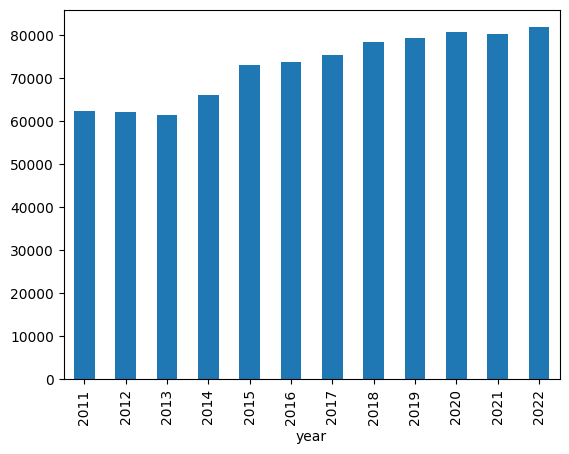

In [214]:
#combined.groupby("year")["total earnings"].mean().plot(kind="bar")
police.groupby("year")["regular"].mean().plot(kind="bar")

<Axes: xlabel='year'>

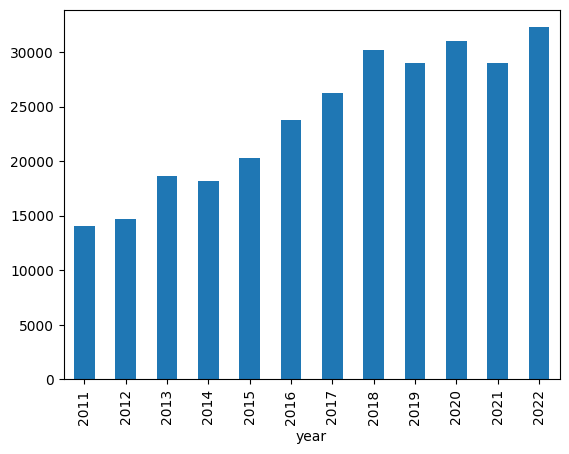

In [215]:
police.groupby("year")["overtime"].mean().plot(kind="bar")

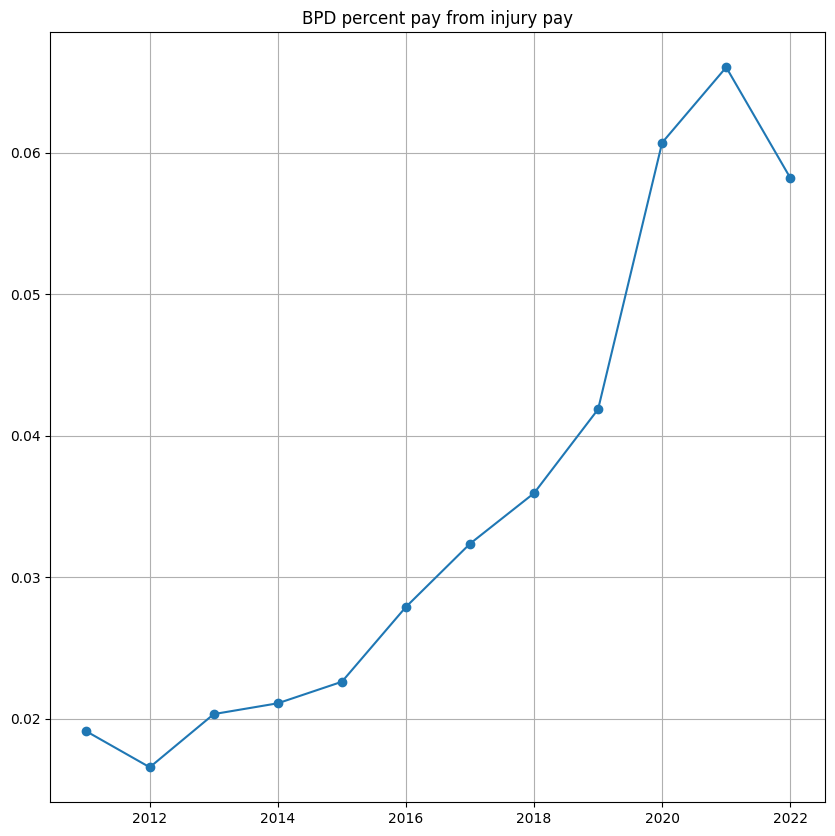

In [244]:
injured = police.groupby("year")["injured"].sum().values
overall = police.groupby("year")["total earnings"].sum().values
res = []
for x in range(len(injured)):
    res.append(injured[x]/overall[x])
year = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
fig, axes = plt.pyplot.subplots(1, 1, figsize=(10, 10))
axes.plot(year, res, marker='o', linestyle='-')
axes.set_title("BPD percent pay from injury pay")
axes.grid(True)

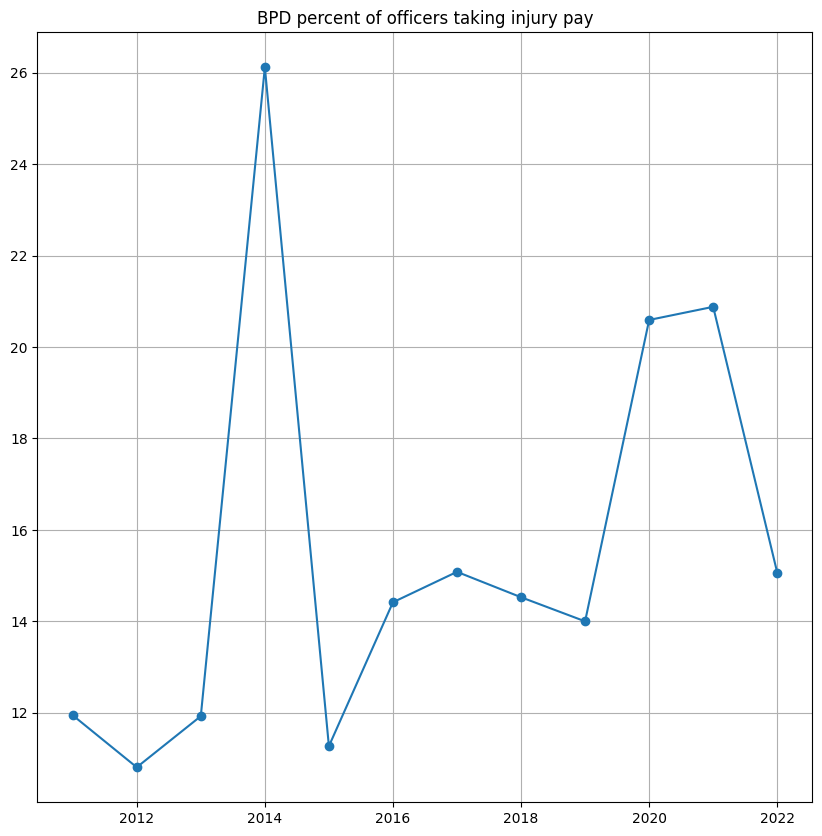

In [230]:
injured = police[police["injured"] > 0].groupby("year")["injured"].count().values
overall = police.groupby("year")["total earnings"].count().values
res = []
for x in range(len(injured)):
    res.append(injured[x]/overall[x] * 100)
year = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
fig, axes = plt.pyplot.subplots(1, 1, figsize=(10, 10))
axes.plot(year, res, marker='o', linestyle='-')
axes.set_title("BPD percent of officers taking injury pay")
axes.grid(True)

In [ ]:

y = ["regular", "retro", "other", "overtime", "injured", "detail", "quinn", "total earnings"]
for x in y:
    try:
        combined[x] = pd.to_numeric(combined[x], errors="raise")
    except:
        combined[x] = combined[x].str.strip()
        combined[x] = combined[x].str.replace('"', '')
        combined[x] = combined[x].str.replace(',', '')
        combined[x] = combined[x].str.replace('$', '')
        combined[x] = combined[x].str.replace('(', '')
        combined[x] = combined[x].str.replace(')', '')
        combined[x] = combined[x].str.replace('-', '')
        combined[x] = pd.to_numeric(combined[x], errors="coerce")

year  department                    
2022  Superintendent                    165515.522000
2021  Boston Fire Department            159502.016631
2022  Boston Fire Department            157168.677931
2020  Boston Fire Department            156167.631466
2019  Boston Fire Department            150346.071087
2015  Asst Superintendent-Network C     142454.520000
2019  Fenway High School                139982.850000
2020  Superintendent                    139091.444000
2021  School Support & Tranformation    138924.520345
      Superintendent                    138561.101667
Name: total earnings, dtype: float64
[2, 2, 2, 6, 9, 3, 2, 1, 3, 3, 4, 4]


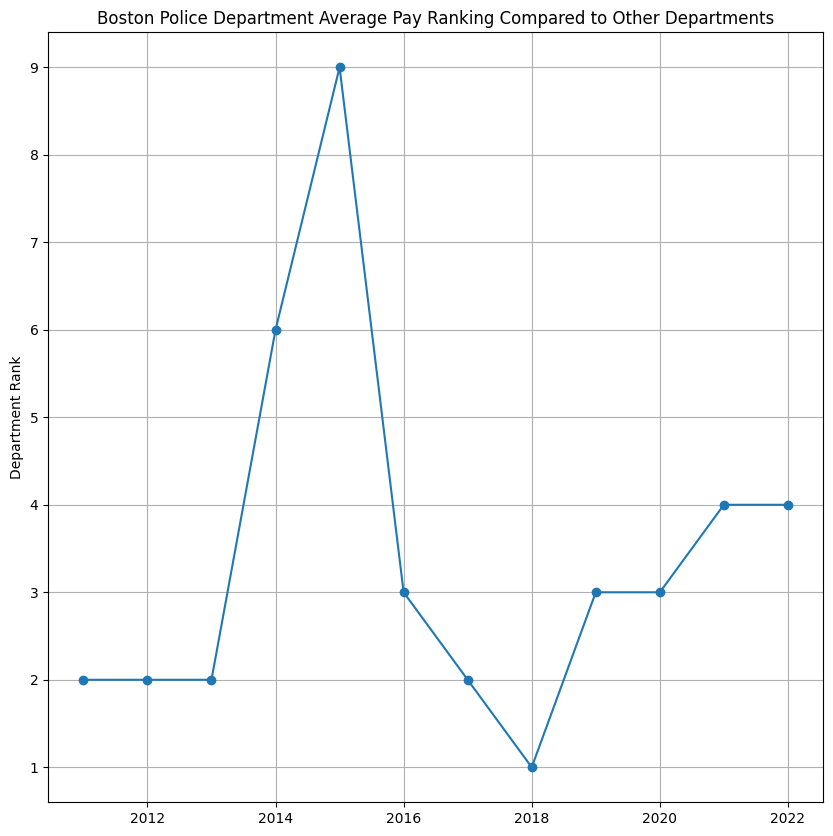

In [255]:
combined_depart = combined.groupby(['year', 'department'])['total earnings'].mean()
departments2012 = combined_depart.sort_values(ascending= False)
year = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
years = {2011: 0, 2012: 0, 2013: 0, 2014: 0, 2015: 0, 2016: 0, 2017: 0, 2018: 0, 2019: 0, 2020: 0, 2021: 0, 2022: 0}
def check(x, y):
    if y in year:
        years[y] += 1
        if x == "Boston Police Department":
            year.remove(y)
            
departments2012.reset_index().apply(lambda x: check(x["department"], x["year"]), axis=1)
print(departments2012.head(10))
print(list(years.values()))
year = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
fig, axes = plt.pyplot.subplots(1, 1, figsize=(10, 10))


axes.plot(year, list(years.values()), marker='o', linestyle='-')
axes.set_title("Boston Police Department Average Pay Ranking Compared to Other Departments")
axes.set_ylabel("Department Rank")
axes.grid(True)